In [1]:
import pandas as pd

In [10]:
import os
import cdsapi
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def download_era5():
    """
    Downloads ERA5 single-level daily data (2m temperature and total precipitation)
    for 2022 over a specified area using the CDS API.
    """
    c = cdsapi.Client()
    # The area is defined as [North, West, South, East]
    # Here we define a broad region that covers the Sahel: North=20, West=-20, South=10, East=40.
    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': [
                '2m_temperature',
                'total_precipitation'
            ],
            'year': '2022',
            'month': [
                '01','02','03','04','05','06',
                '07','08','09','10','11','12'
            ],
            'day': [f'{i:02d}' for i in range(1,32)],
            'time': '12:00',
            'area': [20, -20, 10, 40]  # [north, west, south, east]
        },
        'era5_daily_2022.nc'
    )
    print("Downloaded ERA5 data to era5_daily_2022.nc")

def plot_era5():
    """
    Opens the ERA5 NetCDF file, subsets the data to the Sahel region,
    computes the mean 2m temperature, converts it to Celsius,
    and plots the result on a map.
    """
    ds = xr.open_dataset("era5_daily_2022.nc")
    print(ds)  # Print dataset information for debugging

    # ERA5 data is typically stored with the temperature variable as "t2m" and precipitation as "tp".
    # Subset to the Sahel region. Adjust the lat/lon bounds as needed.
    # Note: ERA5 often uses descending latitudes, so we use slice(20,10).
    sahel = ds.sel(latitude=slice(20, 10), longitude=slice(-20, 40))

    # Convert 2m temperature from Kelvin to Celsius.
    t2m_c = sahel['t2m'] - 273.15
    # Compute the mean temperature over the time dimension.
    t2m_mean = t2m_c.mean(dim='time')

    # Plot the data using Cartopy
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    t2m_mean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm',
                  cbar_kwargs={'label': '2m Air Temperature (°C)'})
    ax.coastlines()
    ax.set_title("Mean 2m Air Temperature in the Sahel (2022)")
    # Set the extent to focus on the Sahel (West, East, South, North)
    ax.set_extent([-20, 40, 10, 20], crs=ccrs.PlateCarree())
    plt.show()

def main():
    # Download the ERA5 data if not already downloaded.
    if not os.path.exists("era5_daily_2022.nc"):
        download_era5()
    # Plot the mean 2m temperature map for the Sahel.
    plot_era5()

if __name__ == "__main__":
    main()


2025-03-20 03:53:39,520 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-20 03:53:39,520 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-03-20 03:53:39,856 INFO Request ID is b7abd2c0-73ff-4bb4-90db-bcb15be9cf08
2025-03-20 03:53:39,914 INFO status has been updated to accepted
2025-03-20 03:53:48,477 INFO status has been updated to running
2025-03-20 03:55:34,163 INFO status has been updated to successful


12407b1f7a2720cce223808b5582fae0.zip:   0%|          | 0.00/6.84M [00:00<?, ?B/s]

Downloaded ERA5 data to era5_daily_2022.nc


ValueError: did not find a match in any of xarray's currently installed IO backends ['scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

<xarray.Dataset> Size: 14MB
Dimensions:     (valid_time: 365, latitude: 41, longitude: 241)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 3kB 2022-01-01T12:00:00 ... 2022-...
  * latitude    (latitude) float64 328B 20.0 19.75 19.5 ... 10.5 10.25 10.0
  * longitude   (longitude) float64 2kB -20.0 -19.75 -19.5 ... 39.5 39.75 40.0
    expver      (valid_time) <U4 6kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 14MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-20T02:55 GRIB to CDM+CF via cfgrib-0.9.1...


C:\Users\loren\anaconda3\envs\StarthackG20\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


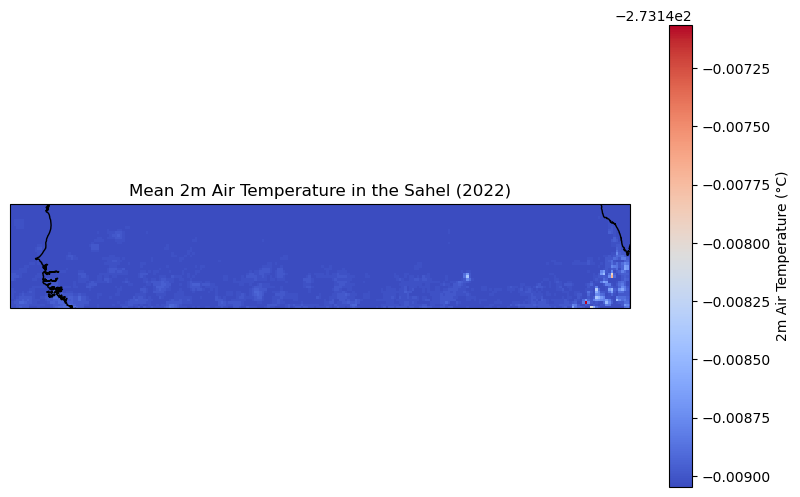

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Open the dataset with the netcdf4 engine
ds = xr.open_dataset("data_stream-oper_stepType-accum.nc", engine="netcdf4")
print(ds)

# Define the Sahel region (latitudes typically descending in ERA5)
sahel = ds.sel(latitude=slice(20, 10), longitude=slice(-20, 40))

# Convert temperature from Kelvin to Celsius (assuming variable is named 't2m')
t2m_c = sahel['tp'] - 273.15
t2m_mean = t2m_c.mean(dim='valid_time')

# Plot using Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
t2m_mean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm',
              cbar_kwargs={'label': '2m Air Temperature (°C)'})
ax.coastlines()
ax.set_title("Mean 2m Air Temperature in the Sahel (2022)")
ax.set_extent([-20, 40, 10, 20], crs=ccrs.PlateCarree())
plt.show()


In [6]:
from netCDF4 import Dataset
ds_direct = Dataset("data_stream-oper_stepType-accum.nc")
print(ds_direct)


<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2025-03-20T02:55 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.39.0 with {"source": "tmpbmrpijde/data.grib", "filter_by_keys": {"stream": ["oper"], "stepType": ["accum"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(365), latitude(41), longitude(241)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(valid_time), float32 tp(valid_time, latitude, longitude)
    groups: 
